#Deep Learning for satellite image downloading

Ali Ben Abbes; Jeaneth Machicao
ali.benabbes@fondationbiodiversite.fr; machicao@usp.br

Presented at VI WORKSHOP ON DATA SCIENCE AND MACHINE LEARNING-PARSEC, 03-06 October 2022, São Paulo, Brazil

# PART 1: Select Region of Interest
Vale do Ribeira

In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
# from tqdm.notebook import tqdm

import pandas as pd
# import csv
import geopandas as gpd
import matplotlib.pyplot as plt

# from shapely import wkt
from shapely.geometry import shape, mapping, Point, Polygon
from shapely.wkt import loads

 

In [3]:
#if exists
#rm -r WDS6-hands-on

### Files reading 
Clone data from github link
*   'setores_censitarios_vale_ribeira.csv' contains the shapefiles from Vale do Ribeira
*   'indicadores_vale_ribeira.csv' contains the indicatores from 2010 calculated using the census data from IBGE - 2010

In [3]:
# Census tracts 

df = pd.read_csv('setores_censitarios_vale_ribeira.csv', sep=';',quotechar='"')
geo_VR = gpd.GeoDataFrame(df, crs= 'epsg:3857', geometry=[loads(pgon) for pgon in df['WKT']])
print("SHAPE SP: "+str(geo_VR.shape))


SHAPE SP: (954, 15)


In [4]:
geo_VR.head()

,Unnamed: 0,Unnamed: 0.1,WKT,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry
0,0,0,"MULTIPOLYGON (((-48.847133 -24.514689,-48.8475...",66717.0,350270505000001,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,"MULTIPOLYGON (((-48.847 -24.515, -48.848 -24.5..."
1,1,1,"MULTIPOLYGON (((-48.845799 -24.51313,-48.84650...",66718.0,350270505000002,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,"MULTIPOLYGON (((-48.846 -24.513, -48.847 -24.5..."
2,2,2,"MULTIPOLYGON (((-48.844894 -24.517396,-48.8450...",66719.0,350270505000003,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,"MULTIPOLYGON (((-48.845 -24.517, -48.845 -24.5..."
3,3,3,MULTIPOLYGON (((-48.850383946118 -24.523331868...,66720.0,350270505000004,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,"MULTIPOLYGON (((-48.850 -24.523, -48.850 -24.5..."
4,4,4,"MULTIPOLYGON (((-48.842276 -24.524945,-48.8424...",66721.0,350270505000005,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,"MULTIPOLYGON (((-48.842 -24.525, -48.842 -24.5..."


In [5]:
# Indicators 
df_indicators = pd.read_csv('indicadores_vale_ribeira.csv')#renda alfabet  longev.
df_indicators['Cod_setor'] = df_indicators['Cod_setor'].astype(str) 
print("SHAPE: "+str(df_indicators.shape))
#remove empty indicators Vale do Ribeira contains 880 available
nan_value = float("NaN")
#Convert NaN values to empty string
df_indicators.replace("", nan_value, inplace=True)
df_indicators.dropna(subset = ['RendaIDHM'], inplace=True)

print("SHAPE: "+str(df_indicators.shape))

#start process cluster 
geo_VR['CD_GEOCODI'] = geo_VR['CD_GEOCODI'].astype(str) 
print("SHAPE CLUSTERS: "+str(geo_VR.shape))

pd_joined_cluster = pd.merge(geo_VR, df_indicators[['Cod_setor','Nome_da_micro', 'Nome_do_municipio','Situacao_setor','RendaIDHM','LongevidadeIDHM','AlfabIDHM']],  how='right', left_on='CD_GEOCODI', right_on='Cod_setor')
print("SHAPE JOINED CLUSTER: "+str(pd_joined_cluster.shape))

df_indicators = pd_joined_cluster.rename(columns={'RendaIDHM': 'income', 'LongevidadeIDHM': 'longevity','AlfabIDHM': 'literacy'})
columns_to_show=['WKT','Cod_setor','TIPO','Nome_da_micro','Nome_do_municipio','income','longevity','literacy']
df_VR_available=df_indicators[columns_to_show]
df_VR_available.head()

SHAPE: (917, 25)
SHAPE: (880, 25)
SHAPE CLUSTERS: (954, 15)
SHAPE JOINED CLUSTER: (880, 22)


,WKT,Cod_setor,TIPO,Nome_da_micro,Nome_do_municipio,income,longevity,literacy
0,"MULTIPOLYGON (((-48.847133 -24.514689,-48.8475...",350270505000001,URBANO,Capão Bonito,APIAÍ,0.606203,0.800000,0.970194
1,"MULTIPOLYGON (((-48.845799 -24.51313,-48.84650...",350270505000002,URBANO,Capão Bonito,APIAÍ,0.671455,0.850000,0.971920
2,"MULTIPOLYGON (((-48.844894 -24.517396,-48.8450...",350270505000003,URBANO,Capão Bonito,APIAÍ,0.778504,0.933333,0.975673
3,MULTIPOLYGON (((-48.850383946118 -24.523331868...,350270505000004,URBANO,Capão Bonito,APIAÍ,0.808376,0.800000,0.939745
4,"MULTIPOLYGON (((-48.842276 -24.524945,-48.8424...",350270505000005,URBANO,Capão Bonito,APIAÍ,0.545806,0.816667,0.968134


In [6]:
#Find the center point 
gdf = gpd.GeoDataFrame(df_VR_available, crs= 'epsg:3857', geometry=[loads(pgon) for pgon in df_VR_available['WKT']])
gdf_crs = gdf.to_crs(3857)  #coordinates in plain degrees
 

# valores_centroid = rj.centroid.to_crs(epsg=4326)
# valores_centroid
gdf_crs['Center_point'] = gdf_crs['geometry'].centroid.to_crs(epsg=3857)
# #Extract lat and lon from the centerpoint
gdf_crs['lat'] = gdf_crs['Center_point'].map(lambda p: p.x)
gdf_crs['lon'] = gdf_crs['Center_point'].map(lambda p: p.y)

gdf_crs.head()

,WKT,Cod_setor,TIPO,Nome_da_micro,Nome_do_municipio,income,longevity,literacy,geometry,Center_point,lat,lon
0,"MULTIPOLYGON (((-48.847133 -24.514689,-48.8475...",350270505000001,URBANO,Capão Bonito,APIAÍ,0.606203,0.800000,0.970194,"MULTIPOLYGON (((-48.847 -24.515, -48.848 -24.5...",POINT (-48.849 -24.513),-48.848982,-24.513062
1,"MULTIPOLYGON (((-48.845799 -24.51313,-48.84650...",350270505000002,URBANO,Capão Bonito,APIAÍ,0.671455,0.850000,0.971920,"MULTIPOLYGON (((-48.846 -24.513, -48.847 -24.5...",POINT (-48.847 -24.512),-48.846967,-24.511579
2,"MULTIPOLYGON (((-48.844894 -24.517396,-48.8450...",350270505000003,URBANO,Capão Bonito,APIAÍ,0.778504,0.933333,0.975673,"MULTIPOLYGON (((-48.845 -24.517, -48.845 -24.5...",POINT (-48.845 -24.515),-48.845093,-24.514756
3,MULTIPOLYGON (((-48.850383946118 -24.523331868...,350270505000004,URBANO,Capão Bonito,APIAÍ,0.808376,0.800000,0.939745,"MULTIPOLYGON (((-48.850 -24.523, -48.850 -24.5...",POINT (-48.847 -24.519),-48.846954,-24.519240
4,"MULTIPOLYGON (((-48.842276 -24.524945,-48.8424...",350270505000005,URBANO,Capão Bonito,APIAÍ,0.545806,0.816667,0.968134,"MULTIPOLYGON (((-48.842 -24.525, -48.842 -24.5...",POINT (-48.842 -24.523),-48.841910,-24.522869


### save the cluster containing lat / long from each census tract

In [7]:
#save csv processed
columns_to_show=['Cod_setor','country', 'year','lat', 'lon','TIPO','income','longevity','literacy']
gdf_crs['country']= 'Brazil' #adding columns with this information
gdf_crs['year'] ='2010'
gdf_crs[columns_to_show].to_csv('VR_clusters.csv', sep=";", quotechar='"', encoding="utf-8")


### Census tract Plots with centroid clusters 

In [8]:
municipiosVR = ['PARIQUERA-AÇU','RIBEIRA','ITAÓCA','CANANÉIA','ELDORADO','IGUAPE','ILHA COMPRIDA','JACUPIRANGA','IPORANGA','JUQUIÁ','ITARIRI','JUQUITIBA','ITAPIRAPUÃ PAULISTA',
        'MIRACATU','TAPIRAÍ','SÃO LOURENÇO DA SERRA','REGISTRO','SETE BARRAS','PEDRO DE TOLEDO','CAJATI','CERRO AZUL', 'ITAPERUÇU','BOCAIÚVA DO SUL','TUNAS DO PARANÁ',
        'RIO BRANCO DO SUL','BARRA DO TURVO','APIAÍ','BARRA DO CHAPÉU','DOUTOR ULYSSES','ADRIANÓPOLIS']

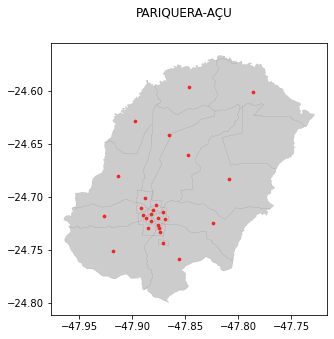

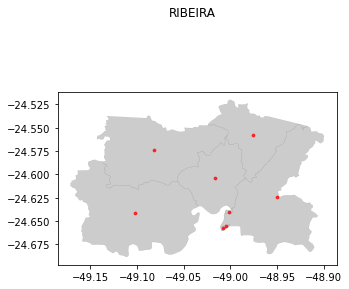

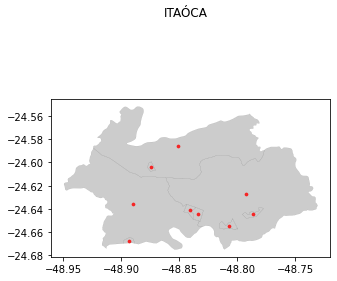

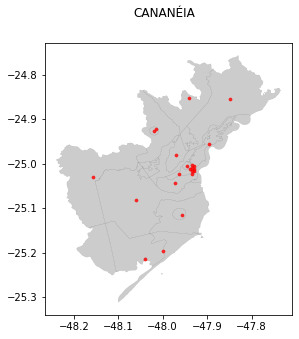

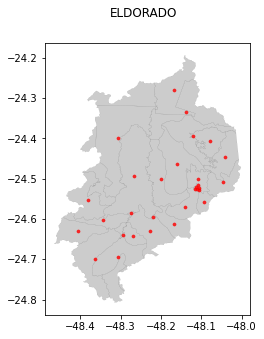

In [9]:
%matplotlib inline
#plot some municripalities centroides by census tracts
for s in range(0,5):
    fig, ax = plt.subplots(figsize=(5,5))
    #sample='BARRA DO TURVO'
    sample=municipiosVR[s]
    plt.suptitle(sample)
    df_temp= gdf_crs[gdf_crs['Nome_do_municipio'] == sample]
    geo_VR_temp =geo_VR[geo_VR['NM_MUNICIP']== sample]
    geo_VR_temp['geometry'].plot(ax=ax,facecolor='gray',alpha=0.4, edgecolor='black', linewidth=0.1) #contourn     

    plt.scatter(x=df_temp['lat'], y=df_temp['lon'],facecolor='red', alpha=0.8, linewidth=0.5, s=10) 
  
 

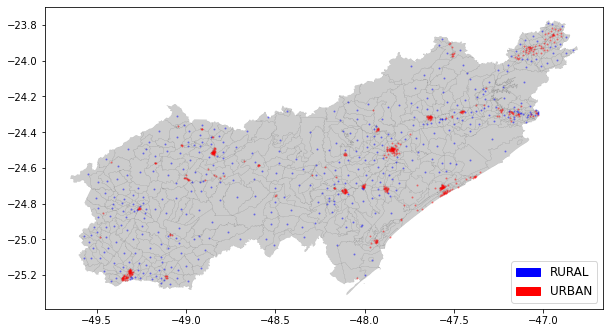

In [10]:
%matplotlib inline
from matplotlib.patches import Patch
fig, ax = plt.subplots(figsize=(10, 10))
# Plot municipality 954 municipalities
geo_VR['geometry'].plot(ax=ax,facecolor='gray',alpha=0.4, edgecolor='black', linewidth=0.1) #contourn 

# Plot centroid of municipality
df1= gdf_crs[gdf_crs['TIPO'] == 'URBANO']
df2= gdf_crs[gdf_crs['TIPO'] == 'RURAL']

df1['Center_point'].plot(ax=ax, facecolor='red', alpha=0.5, linewidth=0.1, markersize=3) #URBANO
df2['Center_point'].plot(ax=ax, facecolor='blue', alpha=0.5, linewidth=0.1, markersize=3) #RURAL

ax.legend(handles=[Patch(facecolor='blue', edgecolor='blue',label='RURAL'),\
    Patch(facecolor='red',edgecolor='red', label='URBAN')],\
    loc='lower right',
    fontsize=12)


### Indicator map plots

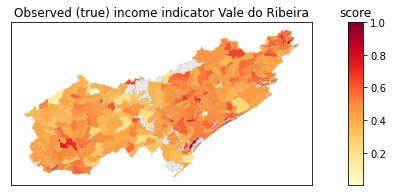

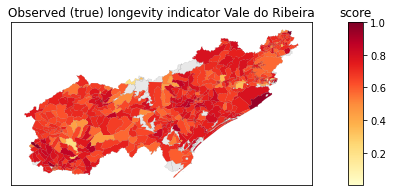

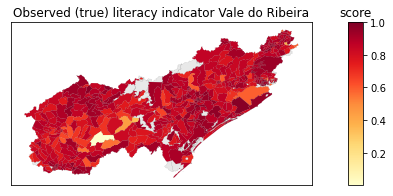

In [11]:
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable


def plot_colorbar(axes):    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
    sm._A = []
    divider = make_axes_locatable(axes=axes)
    cax = divider.append_axes("right", size="5%", pad=0.5)
    cbar = fig.colorbar(sm, cax=cax,  ticks=[0.2, 0.4, 0.6, 0.8, 1])
    cbar.ax.set_title('score')

cmap = plt.cm.get_cmap('YlOrRd')    # conitnuous colors YlOrRd
for indicator in ['income', 'longevity', 'literacy']:
  fig, axs = plt.subplots(1, 1, figsize=(8,3))
  fig.subplots_adjust(hspace=0.5, wspace=0.5)



  # Plot municipality 954 municipalities
  #contourn Vale do Ribeira 
  geo_VR.plot(color= 'lightgray',alpha=0.5, edgecolor='black', ax=axs, linewidth=0.1) #contourn
  
  axs.set_title(f'Observed (true) {indicator} indicator Vale do Ribeira')  
  missing_kwds = dict(color='gray',alpha=0.1, label='No imagery data')
  gdf.plot(column=indicator, k= 5,cmap=cmap,linewidth=0.01,edgecolor='black',missing_kwds=missing_kwds, ax=axs)#color-fill

  axs.axes.get_xaxis().set_visible(False)
  axs.axes.get_yaxis().set_visible(False)
  axs.set_aspect('equal')
  plot_colorbar(axs)

  # plt.rcParams['axes.facecolor'] = 'black'
